# Aim-Here is to trace the players who are in high demand

# Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the EPL database. Store it in a variable called `EPL_data`.

In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics
from scipy import stats

In [2]:
cd E:\shivam imp\sem4\project

E:\shivam imp\sem4\project


In [3]:
df=pd.read_csv("english_premier_league.csv")

In [4]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020
2,Manchester City,Pedro Porro,19,Right-Back,Girona,£10.80m,in,10.8,Premier League,2019,2019/2020
3,Manchester City,Angeliño,22,Left-Back,PSV Eindhoven,£10.80m,in,10.8,Premier League,2019,2019/2020
4,Manchester City,Zack Steffen,24,Goalkeeper,Columbus Crew,£7.20m,in,7.2,Premier League,2019,2019/2020


# ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [5]:
df.columns

Index(['club_name', 'player_name', 'age', 'position', 'club_involved_name',
       'fee', 'transfer_movement', 'fee_cleaned', 'league_name', 'year',
       'season'],
      dtype='object')

In [6]:
df.dtypes

club_name              object
player_name            object
age                     int64
position               object
club_involved_name     object
fee                    object
transfer_movement      object
fee_cleaned           float64
league_name            object
year                    int64
season                 object
dtype: object

In [7]:
df.describe()

,age,fee_cleaned,year
count,563.000000,479.000000,563.0
mean,25.042629,4.465180,2019.0
std,4.413054,11.542427,0.0
min,17.000000,0.000000,2019.0
25%,22.000000,0.000000,2019.0
50%,24.000000,0.000000,2019.0
75%,28.000000,2.455000,2019.0
max,40.000000,90.000000,2019.0


In [8]:
col=df.columns

In [9]:
df.isnull().sum()

club_name              0
player_name            0
age                    0
position               0
club_involved_name     0
fee                    0
transfer_movement      0
fee_cleaned           84
league_name            0
year                   0
season                 0
dtype: int64

In [10]:
df.shape

(563, 11)

In [11]:
np.where(df['fee_cleaned'].isna()==True)

(array([ 27,  29,  30,  31,  43,  60,  61,  95,  96,  97, 118, 119, 142,
        143, 144, 145, 162, 164, 165, 173, 175, 189, 191, 192, 209, 227,
        228, 230, 231, 245, 252, 256, 264, 265, 278, 279, 280, 281, 288,
        289, 290, 312, 318, 319, 326, 327, 338, 339, 347, 372, 383, 389,
        390, 391, 392, 393, 415, 416, 445, 446, 447, 466, 468, 480, 481,
        482, 483, 484, 502, 503, 504, 512, 513, 514, 516, 517, 518, 522,
        546, 547, 548, 549, 551, 554], dtype=int64),)

# Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column.
Round off the percentages upto two decimal places.

In [12]:
df_na=df.isna()
n2=[]
for i in np.arange(df.shape[1]):
    c=col[i]
    s1=0
    for j in np.arange(len(df_na[c])):
        n1=int(df_na[c][j])
        s1=s1+n1
    n2=np.append(n2,s1)   

In [13]:
print(n2)

[ 0.  0.  0.  0.  0.  0.  0. 84.  0.  0.  0.]


In [14]:
DataFrame([col,n2]).T          #one missing section found

,0,1
0,club_name,0
1,player_name,0
2,age,0
3,position,0
4,club_involved_name,0
5,fee,0
6,transfer_movement,0
7,fee_cleaned,84
8,league_name,0
9,year,0


In [77]:
f1=np.where(df["fee_cleaned"].isna()==True)
f1

(array([], dtype=int64),)

In [16]:
s1=0
f2=(np.where(df["fee_cleaned"].isna()==False))[0]
for i in f2:
    s1=s1+(df["fee_cleaned"][i])
m=s1/len(f2)

-  ### Subtask 2.2: Fill NaN values

You might notice that the `fee_cleaned` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'mean'`.

In [17]:
df_t1=DataFrame(df["fee_cleaned"])
df_t1=df_t1.fillna(value=m)

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `fee_cleanes` columns from `£` to 'simple'.

In [18]:
df["fee_cleaned"]=df_t1.values

In [19]:
for i in np.arange(len(df["fee"])):
    if df["fee"][i][0:1]!="£":
        df["fee"][i]=0

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Task 4: EDA(visualization and discripitve statistics)

In [20]:
df.head(2)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020


In [21]:
dfc=(DataFrame(pd.get_dummies(df["club_name"])))
clb=DataFrame(np.sum(dfc),columns=["team"])

In [22]:
(clb["team"]).describe()

count    20.000000
mean     28.150000
std       8.554931
min      15.000000
25%      20.500000
50%      29.000000
75%      35.500000
max      42.000000
Name: team, dtype: float64

Text(0, 0.5, 'frequency')

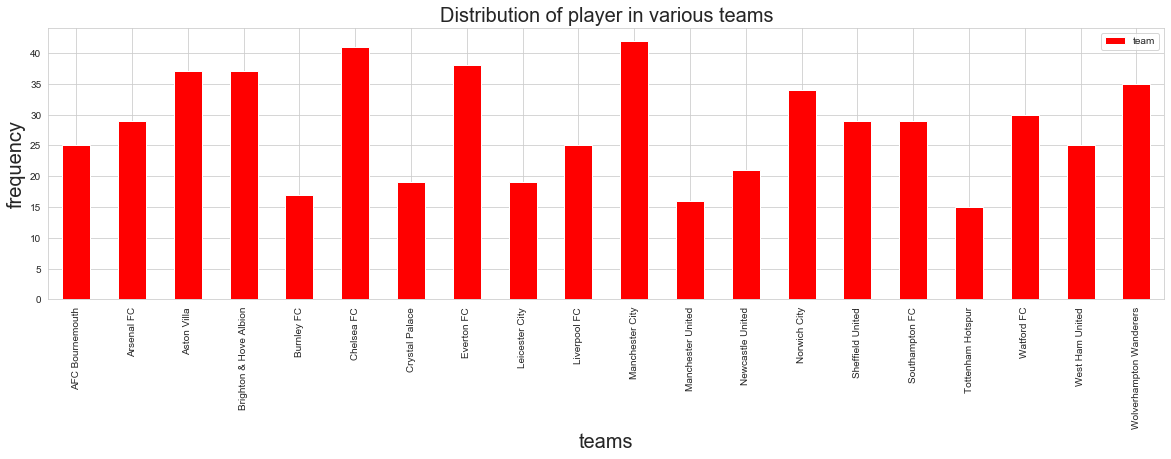

In [23]:
clb.plot(kind="bar",figsize=(20,5),color="red")
plt.title("Distribution of player in various teams",fontsize=20)
plt.xlabel("teams",fontsize=20)
plt.ylabel("frequency",fontsize=20)

In [24]:
df["age"].describe()

count    563.000000
mean      25.042629
std        4.413054
min       17.000000
25%       22.000000
50%       24.000000
75%       28.000000
max       40.000000
Name: age, dtype: float64

Text(0, 0.5, 'Density')

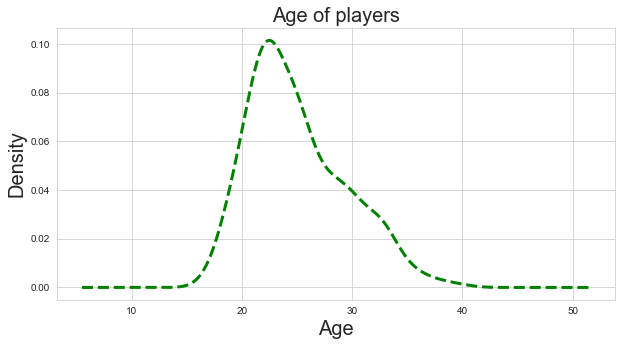

In [25]:
df["age"].plot(kind="kde",color="green",figsize=(10,5),linewidth=3,linestyle="--")
plt.title("Age of players",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Density",fontsize=20)

In [26]:
dfp=(DataFrame(pd.get_dummies(df["position"])))
pos=DataFrame(np.sum(dfp),columns=["position"])
pos=pos.sort_values(by='position',ascending=False)
pos

,position
Attacking Midfield,21
Central Midfield,87
Centre-Back,81
Centre-Forward,106
Defensive Midfield,25
Goalkeeper,59
Left Midfield,9
Left Winger,47
Left-Back,31
Midfielder,1


In [30]:
df_bc=(DataFrame(pd.get_dummies(df["club_involved_name"])))
bc=DataFrame(np.sum(df_bc),columns=["base_club"])
bc=bc.sort_values(by='base_club',ascending=False)
bc

,base_club
Without Club,16
Fulham,10
Leeds,9
Swansea,9
Monaco,8
Derby,8
QPR,8
Nottm Forest,8
Stoke City,8
Retired,7


In [32]:
f=[]
for i in np.arange(len(df["fee"])):
    if df["fee"][i]=="£" or df["fee"][i]!=0:
        f=np.append(f,df["fee"][i])

In [33]:
len(f)

132

In [34]:
f2=[]
for i in np.arange(len(f)):
    f1=f[i][1:]
    f11=f1[:-1]
    if f[i][-1:]=="m":
        f2=np.append(f2,float(f11))
    else:
        f2=np.append(f2,(float(f11)/1000))

In [35]:
fz=len(df["fee"])-len(f)

([<matplotlib.patches.Wedge at 0x2b6e4b2ce80>,
 [Text(-1.4519198325616016, 1.316635408841146, 'on loan'),
  Text(1.3778422315925174, -1.249460197381314, 'salary paid')],
 [Text(-0.8592994927405395, 0.7792332011508822, '76.6%'),
  Text(0.7852219169290691, -0.7120579619484906, '23.4%')])

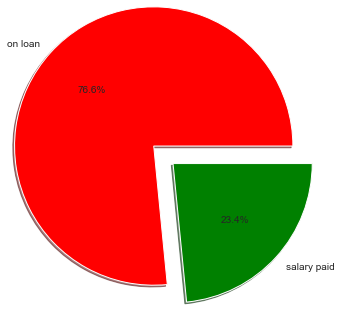

In [36]:
plt.pie([fz,len(f2)],labels=["on loan","salary paid"],radius=1.6,shadow=True,explode=[.2,.1],colors="rgba",autopct='%1.1f%%')

Text(0, 0.5, 'frequency')

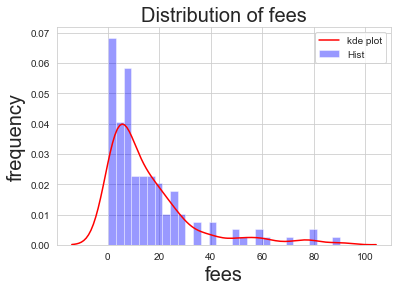

In [37]:
sns.distplot(f2,bins=30,
              kde_kws={"color":"red","label":"kde plot"},
              hist_kws={"color":"blue","label":"Hist"})
plt.title("Distribution of fees",fontsize=20)
plt.xlabel("fees",fontsize=20)
plt.ylabel("frequency",fontsize=20)

# The players who are in  are in maximum demand

In [47]:
df.head(1)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020


In [48]:
df1=df[["club_name","player_name","age","position","fee","transfer_movement","fee_cleaned"]]
df_in=df1[df1["transfer_movement"]=="in"]
df_out=df1[df1["transfer_movement"]=="out"]

([<matplotlib.patches.Wedge at 0x2b6e7d6a4a8>,
 [Text(0.034371238357313705, 1.7596643480998828, ''),
  Text(-0.03437123835731392, -1.7596643480998828, '')],
 [Text(0.018747948194898383, 0.9598169171453905, '49.4%'),
  Text(-0.018747948194898497, -0.9598169171453905, '50.6%')])

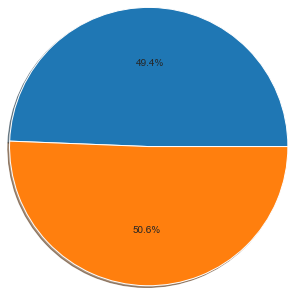

In [49]:
plt.pie([len(df_in["fee"]),len(df_out["fee"])],radius=1.6,shadow=True,autopct='%1.1f%%')

In [50]:
am_in=np.mean(df_in["age"])
am_out=np.mean(df_out["age"])

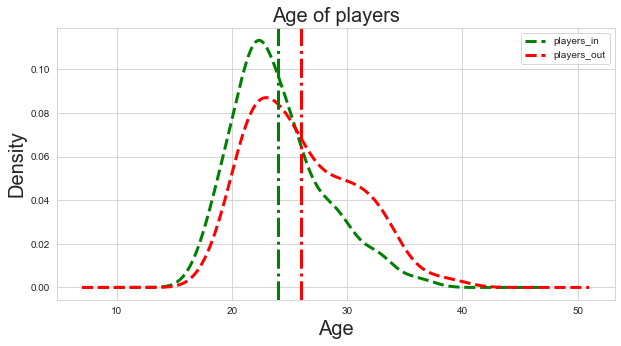

In [51]:
df_in["age"].plot(kind="kde",color="green",figsize=(10,5),linewidth=3,linestyle="--")
df_out["age"].plot(kind="kde",color="red",figsize=(10,5),linewidth=3,linestyle="--")
plt.axvline(x=am_in,linewidth=3,linestyle="-.",color="green")
plt.axvline(x=am_out,linewidth=3,linestyle="-.",color="red")
plt.title("Age of players",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Density",fontsize=20)
plt.legend(["players_in","players_out"])

In [52]:
Series([am_in,am_out],["in","out"])       #avg age of players in and out respectively

in     24.032374
out    26.028070
dtype: float64

In [53]:
dfp_in=(DataFrame(pd.get_dummies(df_in["position"])))
pos1=DataFrame(np.sum(dfp_in),columns=["position_in"])
dfp_out=(DataFrame(pd.get_dummies(df_out["position"])))
pos2=DataFrame(np.sum(dfp_out),columns=["position_out"])
pos1["position_out"]=pos2["position_out"]

In [54]:
def avg(df_t,pos,qnt): 
     return(np.mean(((df_t[df_t["position"]==pos])[qnt]).values))

In [55]:
avg(df_in,"Attacking Midfield","age")

23.583333333333332

In [59]:
def std(df_t,pos,qnt): 
     return(np.std(((df_t[df_t["position"]==pos])[qnt]).values))

In [60]:
a11=[]
a12=[]
a13=[]
a14=[]
f11=[]
f12=[]
f13=[]
f14=[]
for i in np.unique(df_in["position"]):
    a11=np.append(a11,avg(df_in,i,"age"))
    a12=np.append(a12,avg(df_out,i,"age"))
    a13=np.append(a13,std(df_in,i,"age"))
    a14=np.append(a14,std(df_out,i,"age"))
    f11=np.append(f11,avg(df_in,i,"fee_cleaned"))
    f12=np.append(f12,avg(df_out,i,"fee_cleaned"))
    f13=np.append(f13,std(df_in,i,"fee_cleaned"))
    f14=np.append(f14,std(df_out,i,"fee_cleaned"))

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [61]:
pos1["avg_age_in"]=a11
pos1["avg_age_out"]=a12
pos1["avg_fee_in"]=f11
pos1["avg_fee_out"]=f12
pos1["sd_age_in"]=a13
pos1["sd_age_out"]=a14
pos1["sd_fee_in"]=f13
pos1["sd_fee_out"]=f14

In [62]:
p_in=pos1["position_in"]/(pos1["position_in"]+pos1["position_out"])

In [63]:
pos1["prob_in"]=p_in

In [64]:
pos1

,position_in,position_out,avg_age_in,avg_age_out,avg_fee_in,avg_fee_out,sd_age_in,sd_age_out,sd_fee_in,sd_fee_out,prob_in
Attacking Midfield,12,9.0,23.583333,24.888889,2.992265,3.758393,4.132359,4.886363,6.915182,4.117587,0.571429
Central Midfield,44,43.0,23.795455,25.488372,5.599663,2.346217,3.526391,3.943627,12.162746,3.176480,0.505747
Centre-Back,40,41.0,23.750000,25.902439,5.135388,4.402957,4.340219,4.863026,13.214553,12.285092,0.493827
Centre-Forward,50,56.0,23.740000,25.678571,5.901518,3.678884,4.009040,4.255698,10.276137,8.577519,0.471698
Defensive Midfield,13,12.0,24.769231,27.833333,8.685783,3.666295,2.390811,3.387067,17.049010,7.277894,0.520000
Goalkeeper,29,30.0,26.551724,28.333333,1.777802,1.323197,5.150067,6.122817,2.462931,2.305808,0.491525
Left Midfield,4,5.0,21.750000,22.800000,6.952500,0.000000,1.920286,1.600000,10.117572,0.000000,0.444444
Left Winger,24,23.0,22.708333,24.913043,5.122500,7.200885,2.637536,4.031539,7.647569,18.837584,0.510638
Left-Back,14,17.0,24.928571,26.352941,4.590000,2.935084,3.261557,3.661263,7.492814,3.495421,0.451613
Midfielder,1,NaN,18.000000,NaN,4.465180,NaN,0.000000,NaN,0.000000,NaN,NaN


In [67]:
def selction(name,pos,age,fee):
    p1=pos1["prob_in"][pos]
    a1=pos1.T[pos]["avg_age_in"]
    sd1=pos1.T[pos]["sd_age_in"]
    age_ul=a1+3*sd1
    age_ll=a1-3*sd1
    if age>=age_ll and age<=age_ul:
        p2=.95
    else:
        p2=.05
    f1=pos1.T[pos]["avg_fee_in"]
    sd2=pos1.T[pos]["sd_fee_in"]
    fee_ul=f1+3*sd2
    fee_ll=f1-3*sd2
    if fee>=fee_ll and fee<=fee_ul:
        p3=.95
    else:
        p3=.05
    p=p1*p2*p3
    return(name,"the probabilty of your selection is ", p)

In [68]:
s=selction("hk","Right-Back",24,2)
s[2]

0.43073863636363635

In [69]:
p_sel=[]
for i in np.arange(len(df["fee"])):
    s=selction(df["player_name"][i],df["position"][i],df["age"][i],df["fee_cleaned"][i])
    p_sel=np.append(p_sel,s[2])

In [70]:
df["p_sel"]=p_sel

In [71]:
df.sort_values("p_sel",ascending=True)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season,p_sel
483,Norwich City,Steven Naismith,32,Second Striker,Heart of Midl.,0,out,4.46518,Premier League,2019,2019/2020,0.000625
557,Aston Villa,Ross McCormack,32,Second Striker,Without Club,0,out,0.00000,Premier League,2019,2019/2020,0.011875
492,Norwich City,Ben Marshall,28,Right Midfield,Without Club,0,out,0.00000,Premier League,2019,2019/2020,0.015833
519,Sheffield United,Mark Duffy,33,Right Midfield,Stoke City,0,out,0.00000,Premier League,2019,2019/2020,0.015833
365,AFC Bournemouth,Jermain Defoe,37,Centre-Forward,Rangers,0,in,0.00000,Premier League,2019,2019/2020,0.022406
334,Newcastle United,Joelinton,22,Centre-Forward,TSG Hoffenheim,£39.60m,in,39.60000,Premier League,2019,2019/2020,0.022406
395,Burnley FC,Peter Crouch,38,Centre-Forward,Retired,0,out,0.00000,Premier League,2019,2019/2020,0.022406
159,Manchester United,Romelu Lukaku,26,Centre-Forward,Inter,£58.50m,out,58.50000,Premier League,2019,2019/2020,0.022406
143,Arsenal FC,Stephan Lichtsteiner,35,Right-Back,FC Augsburg,0,out,4.46518,Premier League,2019,2019/2020,0.022670
461,Brighton & Hove Albion,Bruno,38,Right-Back,Retired,0,out,0.00000,Premier League,2019,2019/2020,0.022670


In [76]:
selction("Peter Crouch","Centre-Forward",24,0)

('Peter Crouch', 'the probabilty of your selection is ', 0.4257075471698113)